<a href="https://colab.research.google.com/github/phonism/notes/blob/master/Machine_Learning_Coding_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kmeans
K-means clustering is an unsupervised machine learning algorithm that seeks to segment a dataset into groups based on the similarity of datapoints.

The kMeans algorithm finds those k points (called centroids) that minimize the sum of squared errors.

Thus, the Kmeans algorithm consists of the following steps:
+ We initialize k centroids randomly.
+ Then we calcuate the distance from each point to each centroid.
+ Assign each point to their nearest centroid.
+ Centroids are shifted to be the average value of the points belonging to it.If the centroids did not move, the algorithm is finished, else repeat.


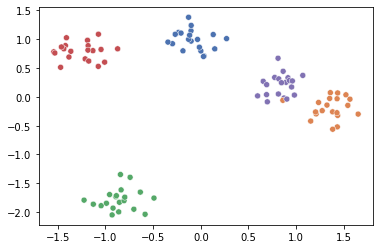

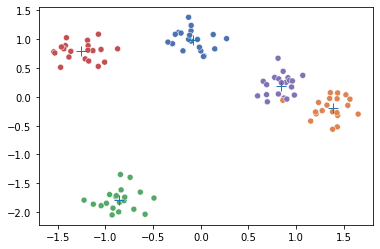

In [27]:
import numpy as np
from numpy.random import uniform
import random
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    palette="deep",
    legend=None)
plt.show()

def euclidean(point, centroids):
    return np.sqrt(np.sum((point - centroids) ** 2, axis=1))

class KMeans(object):
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters

    def fit(self, x):
        min_val = np.min(x, axis=0)
        max_val = np.min(x, axis=0)
        self.centroids = np.array([random.choice(x) for _ in range(self.n_clusters)])
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < 300:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for p in x:
                dists = euclidean(p, self.centroids)
                sorted_points[np.argmin(dists)].append(p)
            new_centroids = []
            for cluster in sorted_points:
                if len(cluster) > 0:
                    new_centroids.append(np.mean(cluster, axis=0))
                else:
                    new_centroids.append(np.array([0, 0]))
            prev_centroids = self.centroids
            self.centroids = np.array(new_centroids)

kmeans = KMeans(n_clusters=centers)

x = np.random.rand(1000, 2)
kmeans.fit(X_train)

sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    palette="deep",
    legend=None)

plt.plot(
    [x for x, _ in kmeans.centroids],
    [y for _, y in kmeans.centroids],
    '+',
    markersize=10)
plt.show()

## K-nearest Neighbors (KNN)
The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.

+ Initialize K to your chosen number of neighbors
+ For each example in the data
    + Calculate the distance between the query example and the current example from the data.
    + Add the distance and the index of the example to an ordered collection
+ Sort the ordered collection of distances
 and indices from smallest to largest (in ascending order) by the distances
+ Pick the first K entries from the sorted collection
+ Get the labels of the selected K entries
+ If regression, return the mean of the K labels
+ If classification, return the mode of the K labels

In [14]:
import numpy as np

class KNN(object):
    def __init__(self):
        pass

    def euclidean(self, q, x):
        # l2
        return np.sqrt(np.sum((q - x) ** 2, axis=1))

    def manhattan(self, q, x):
         |x1 - x2| + |y1 - y2|.
    
    def mode(self, x):
        vals, counts = np.unique(x, return_counts=True)
        return vals[np.argmax(counts)]

    def fit(self, x, y, query, k):
        dist = self.euclidean(q, x)
        dist_with_index = sorted([(dist[idx], idx) for idx in range(len(dist))])
        return self.mode([y[idx] for val, idx in dist_with_index[:k]])

knn = KNN()

n = 100
x = np.random.rand(n, 2)
y = np.random.randint(2, size=n)
q = np.random.rand(1, 2)

print(knn.fit(x, y, q, 9))

1


## **Linear Regression**
### Introduction
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).

The main type of linear regression is 
$$f(x)=w_{1}x1 + w_{2}x2 + w_{3}x3 + b$$
which $w$ represents the weights, our model will try to learn. The variables $x1, x2,x3$ represent the input data's attributes. The variable $y$ represents our prediction.

### **Making Predictions**
Let's say our predict function outputs an estimate of ctr(click-through rate)  given our current weights and some attributes $x1,x2,x3$. 
```python
def forward(self, x):
    y_pred = np.matmul(x, self.w) + self.b
    return y_pred
```
### **Cost Function**
Now we need a cost function to audit how our model is performing. We use MSE function. 
$$MSE=\frac{1}{2n}\sum_{i=1}^{n}(y_i - (w_{1}x1_{i} + w_{2}x2_{i}+w_{3}x3_{i} + b))^2$$
Our model will try to identify weight values that most reduce our cost function.
```python
def cost_function(self, x, y_true):
    n = len(y_true)
    y_pred = self.forward(x)
    sq_error = (y_pred - y_true) ** 2
    return 1.0 / (2 * n) * sq_error.sum()
```

### **Gradient Descent**
To minimize MSE we use Gradient Descent to calculate the gradient of our cost function. Gradient descent consists of looking at the error that our weight currently gives us, using the derivative of the cost function to find the gradient (The slope of the cost function using our current weight), and then changing our weight to move in the direction opposite of the gradient. We need to move in the opposite direction of the gradient since the gradient points up the slope instead of down it, so we move in the opposite direction to try to decrease our error.

Again using the Chain rule we can compute the gradient vector of partial derivatives describing the slope of the cost function for each weight.
$$f^{'}(w_{1}) = -x1(y - (w_{1}x1 + w_{2}x2 + w_{3}x3 + b)$$
$$f^{'}(w_{2}) = -x2(y - (w_{1}x1 + w_{2}x2 + w_{3}x3 + b)$$
$$f^{'}(w_{3}) = -x3(y - (w_{1}x1 + w_{2}x2 + w_{3}x3 + b)$$
```python
def compute_gradients(self, x, y_true):
    y_pred = self.forward(x)
    difference = y_pred - y_true
    gradient_b = np.mean(difference)
    gradients_w = np.matmul(x.transpose(), difference)
    gradients_w = np.array([np.mean(grad) for grad in gradients_w])
```

### **Train**
Training a model is the process of iteratively improving your prediction equation by looping through the dataset multiple times, each time updating the weight and bias values in the direction indicated by the slope of the cost function (gradient). Training is complete when we reach an acceptable error threshold, or when subsequent training iterations fail to reduce our cost.
```python
def __init__(self):
    self.w = np.random.rand(feature_num)
    self.b = np.random.rand(1)

def update_weightes(self, x, y_true, learning_rate):
    gradients_w, gradient_b = self.compute_gradients(x, y_true)
    self.w = self.w - learning_rate * gradients_w
    self.b = self.b - learning_rate * gradient_b

def train(self, x, y):
    epoch_num = 1000
    learning_rate = 0.01
    for epoch in range(epoch_num):
        model.update_weightes(x, y, learning_rate)
```

### **Normalize**
As the number of features grows, calculating gradient takes longer to compute, and the gradient may be very huge and we may meet some overflow err. We can speed this up by “normalizing” our input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Our goal now will be to normalize our features so they are all in the range -1 to 1.
```python
def normalize(self, x):
    for feature in x.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)
        feature -= fmean
        feature /= frange
    return x
```

In [ ]:
import numpy as np

feature_num = 3

class LinearRegression(object):
    def __init__(self):
        self.w = np.random.rand(feature_num)
        self.b = np.random.rand(1)

    def forward(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        return y_pred
    
    def normalize(self, x):
        for feature in x.T:
            fmean = np.mean(feature)
            frange = np.amax(feature) - np.amin(feature)
            feature -= fmean
            feature /= frange
        return x

    def cost_function(self, x, y_true):
        n = len(y_true)
        y_pred = self.forward(x)
        sq_error = (y_pred - y_true) ** 2
        return 1.0 / (2 * n) * sq_error.sum()
    
    def compute_gradients(self, x, y_true):
        y_pred = self.forward(x)
        difference = y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b
    
    def update_weightes(self, x, y_true, learning_rate):
        gradients_w, gradient_b = self.compute_gradients(x, y_true)
        self.w = self.w - learning_rate * gradients_w
        self.b = self.b - learning_rate * gradient_b
    
    def train(self, x, y):
        epoch_num = 1000
        learning_rate = 0.01
        for epoch in range(epoch_num):
            model.update_weightes(x, y, learning_rate)

model = LinearRegression()

N = 1000
# y = 1 * x1 - 2 * x2 + 3 * x3 + 12
def gen_data(x):
    y = []
    for i in range(N):
        y.append(x[i][0] - 2 * x[i][1] + 3 * x[i][2] + 12)
    return np.array(y)

x = np.random.rand(N, 3)
y = gen_data(x)

x = model.normalize(x)
model.train(x, y)
print(model.w, model.b)

[ 0.99828682 -1.99113219  2.99342082] [-268782.10094641]


## Logistic Regression
### Introduction
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.
 
### **Sigmoid Function**
In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.
$$Sigmoid(x) = \frac{1}{1 + e^{-x}}$$
```python
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))
```

### **Cost Function**
Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for $y=1$ and one for $y=0$.
$$L = \frac{1}{m}(-y^{T}log(y\_pred) - (1-y)^{T}log(1-y\_pred))$$

In [ ]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

class LogisticRegression(object):
    def __init__(self):
        self.w = np.random.rand(feature_num)
        self.b = np.random.rand(1)
    
    def forward(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        y_pred = sigmoid(y_pred)
        return y_pred
    
    def normalize(self, x):
        for feature in x.T:
            fmean = np.mean(feature)
            frange = np.amax(feature) - np.amin(feature)
            feature -= fmean
            feature /= frange
        return x

    def cross_entropy(self, x, y_true):
        m = len(y_true)
        y_pred = self.forward(x)
        class1_cost = -y_true * np.log(y_pred)
        class2_cost = (1 - y_true) * np.log(1 - y_pred)
        cost = class1_cost - class2_cost
        cost = cost.sum() / m
        return cost
    
    def compute_gradients(self, x, y_true):
        y_pred = self.forward(x)
        difference = y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b
    
    def update_weightes(self, x, y_true, learning_rate):
        gradients_w, gradient_b = self.compute_gradients(x, y_true)
        self.w = self.w - learning_rate * gradients_w
        self.b = self.b - learning_rate * gradient_b
    
    def train(self, x, y):
        epoch_num = 1000
        learning_rate = 0.01
        for epoch in range(epoch_num):
            model.update_weightes(x, y, learning_rate)
    
    def predict(self, x, y):
        print(y)
        print(self.forward(x))

model = LogisticRegression()

N = 1000
# y = 1 * x1 - 2 * x2 + 3 * x3 - 1
def gen_data(x):
    y = []
    for i in range(N):
        y_true = x[i][0] - 2 * x[i][1] + 3 * x[i][2] - 1
        if y_true > 0:
            y.append(1)
        else:
            y.append(0)
    return np.array(y)

x = np.random.rand(N, 3)
y = gen_data(x)

x = model.normalize(x)
model.train(x, y)
print(model.w, model.b)
model.predict(x[:10], y[:10])

[ 10.44756978 -20.78139095  31.64716938] [0.53287193]
[0 0 1 0 0 1 1 1 1 1]
[5.48030739e-01 1.92401937e-05 1.00000000e+00 8.33032784e-02
 3.62622457e-10 9.99999998e-01 9.99941493e-01 9.99862098e-01
 9.99999097e-01 9.99970778e-01]


## Decision trees


## Glossary
[https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html](https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html)

+ **Normal Distribution:**
    + The Normal Distribution is probably the most important and commonly-encountered probability distribution.
    + In a normal distribution, 68% of data is within one σ from μ and 95% of data is within two σ.
    + It is “convenient” to operate on normal distributions. Many intractable problems can now be solved analytically. And many operations on normal distributions return a normal distribution.
    + One of the convenience is that when we multiply two normal distributions, its result is just another normal distribution scaled by a factor s
    + its summation is also normally distributed.


## Gradient Desent

## [Adam](https://machinelearningmastery.com/adam-optimization-from-scratch)
> **TODO**: 先实现一个basic dnn，可以使用手写数字的例子，然后把所有的basic tech都用上。all from scratch

The Adaptive Movement Estimation algorithm, or Adam for short, is an extension to gradient descent and a natural successor to techniques like AdaGrad and RMSProp that automatically adapts a learning rate for each input variable for the objective function and further smooths the search process by using an exponentially decreasing moving average of the gradient to make updates to variables.
+ Gradient descent is an optimization algorithm that uses the gradient of the objective function to navigate the search space.
+ Gradient descent can be updated to use an automatically adaptive step size for each input variable using a decaying average of partial derivatives, called Adam.
+ How to implement the Adam optimization algorithm from scratch and apply it to an objective function and evaluate the results.



In [ ]:
import numpy as np

class DeepNeuralNetwork(object):
    def __init__(self):
        self.input_layer_size = 128
        self.hidden_layer_size = 256
        self.output_layer_size = 2
        self.init_weights()
        self.init_bias()
    
    def init_weights(self):
        self.w1 = np.random.randn(self.input_layer_size, self.hidden_layer_size) * \
                np.sqrt(2.0 / self.input_layer_size)
        self.w2 = np.random.randn(self.hidden_layer_size, self.output_layer_size) * \
                np.sqrt(2.0 / self.hidden_layer_size)
    
    def init_bias(self):
        self.b1 = np.full((1, self.hidden_layer_size), 0.1)
        self.b2 = np.full((1, self.output_layer_size), 0.1)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_prime(self, x):
        x[x < 0] = 0
        x[x > 0] = 1
        return x
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
         # Hidden layer
        x = np.dot(x, self.w1) + self.b1
        x = self.relu(x)

        # Output layer
        x = np.dot(x, self.w2) + self.b2
        x = self.relu(x)
        return x
    
    def backprop(self, x, y):
        """
        反向传播的本质是利用chain rule求解整个function对w的导数
        """
        y_pred = self.forward(x)
        d = (y_pred - y) * self.relu_prime(y_pred)
        print(loss)

dnn = DeepNeuralNetwork()
x = np.random.randn(dnn.input_layer_size)
y = np.array([1, 0])
print(dnn.forward(x))
dnn.backprop(x, y)


[[0.75108166 0.        ]]


NameError: ignored